## Phase shifts and cross section

### Two-nucleon scattering by a central potential

Consider two nucleons each of mass $m=938$ MeV/$c^2$
interacting via a central potential given by

$$
V(r) = 
\begin{cases}
              -V_0\, \quad\quad           & \text{for }                r \leq R \,  \\
{\color{white}-}0 \, \quad\quad           & \text{otherwise }\,  \\
\end{cases}
$$

where $V_0$ is positive and $R=1.45$ fm. 

We seek the solution, $u(r)=r\,R(r)$, of the radial equation
\begin{equation}
 -\frac{\hbar^2}{2\,\mu}u^{\prime\prime}(r) +V(r)\,u(r) +\frac{\hbar^2}{2\,\mu}\,\frac{\ell(\ell+1)}{r^2}\,u(r)=E\,u(r)\, ,
\end{equation}
where 
\begin{eqnarray}
 E&=&\frac{\hbar^2\,k^2}{2\,\mu}\, , \quad {\rm and}\quad \quad  \mu=\frac{m}{2} \, ,
\end{eqnarray}
and we have introduced the reduced mass of the system, $\mu$.

We define
\begin{equation}
 v(r)=\frac{2\,\mu}{\hbar^2}\,V(r) \, ,
\end{equation}
and rewrite the equation above  as
\begin{eqnarray}
&& u^{\prime\prime}(r) +\left[k^2 - v(r) -\frac{\ell(\ell+1)}{r^2}\right]\,u(r)=0\, ,\nonumber 
\end{eqnarray}
or
\begin{eqnarray}
&& u^{\prime\prime}(r) + K(r) u(r)=0 \, ,
\end{eqnarray}
with 
\begin{equation}
 K(r)=\frac{2\,\mu}{\hbar^2}\left[E-V(r)\right] - \frac{\ell(\ell+1)}{r^2} = {k^\prime}^2- \frac{\ell(\ell+1)}{r^2}\, .
\end{equation}

In [1]:
# Initialization

import numpy as np
import cmath
import matplotlib.pyplot as plt
from scipy import special
plt.rcParams['text.usetex'] = True

### Constants of the problem

In [2]:
# Constants
hbarc    = 197.326963                # MeV*fm
redmass  = 0.5 * 938.                # MeV
xr       = 1.45                      # fm  Range of the potential
vnot     = 20.                       # MeV Strength of the potential
mhbar    = 2. * redmass / hbarc**2   # 1/(MeV*fm^2); 2*mu/hbar**2
pi       = cmath.pi

### Exercise 1 

Here we define the potential as a function. 

In [3]:
# Potential 
def pot(x, elle):
    if x >= xr:
        return          elle * (elle + 1) / (x**2 * mhbar)
    else:
        return - vnot + elle * (elle + 1) / (x**2 * mhbar)
# Vectorized version of pot
def pot_vec(x_array, elle):
    return np.array([pot(x, elle) for x in x_array])

### Exercise 2 

Plot the `effective' potential for $\ell=0$--S-wave channel--as a function of $r$. 

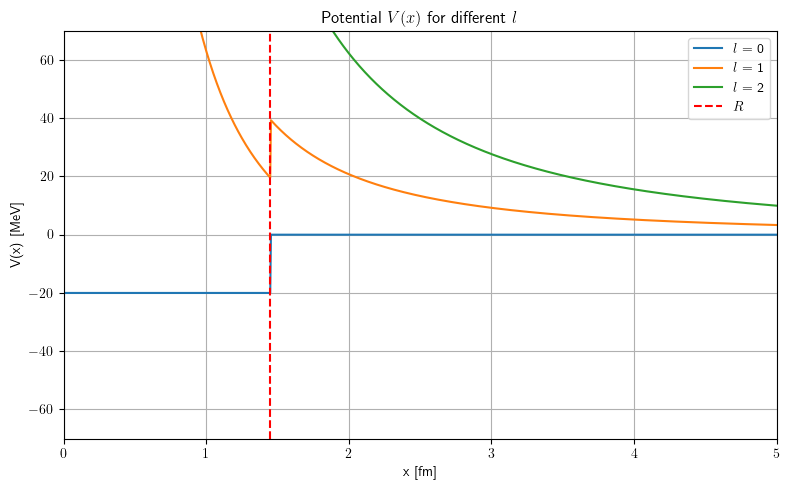

In [4]:
# Plot setup
plt.figure(figsize=(8, 5))

# x values (avoid zero)
x_vals = np.linspace(0.01, 5.0, 1000)

# Plot for l = 0, 1, 2
for ell in [0,1,2]:
    v_fig    = pot_vec (x_vals, ell)
    plt.plot(x_vals, v_fig, label=f"$l$ = {ell}")

# Vertical line at xr
plt.axvline(xr, color='red', linestyle='--', label="$R$")
plt.xlim(0,5)
plt.ylim(-70,70)
# Labels and legend
plt.title("Potential $V(x)$ for different $l$")
plt.xlabel("x [fm]")
plt.ylabel("V(x) [MeV]")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

### Exact solutions for l=0 (S-wave)

The exact solution of the phase shift in the S-wave, $\delta_0$, is given by:

\begin{equation}
\tan{\delta_0} = \frac{\cos{kR}\, \sin{k^\prime R} - \frac{k^\prime}{k}\cos{k^\prime R}\, \sin{k R}}  {\frac{k^\prime}{k} \cos{kR}\, \cos{k^\prime R} + \sin{k^\prime R}\, \sin{k R}   }\, ,
\end{equation}
in terms of which the cross section reads
\begin{equation}
\sigma_\ell = \frac{4\, \pi}{k^2}\, (2\,\ell +1) \,\sin{\delta_\ell}^2 \, ,
\end{equation}

### Exercise 3 

Plot the phase shift and cross section as a function of the energy in the interval $E=[0:200]$ MeV. 
Print out the values of the phase shift and cross section for a few energies. 
We will use these results for benchmark pourposes, to make sure our code is properly working. 

------------- S wave scattering -----------
-------------------------------------------
---- Energy [MeV] = 0.0500
---- Phase Shift exact [deg] = 1.6399
---- Cross Section exact [fm^2] = 8.5449
-------------------------------------------
---- Energy [MeV] = 5.0000
---- Phase Shift exact [deg] = 14.2874
---- Cross Section exact [fm^2] = 6.3540
-------------------------------------------
---- Energy [MeV] = 50.0000
---- Phase Shift exact [deg] = 19.7182
---- Cross Section exact [fm^2] = 1.1876
-------------------------------------------
---- Energy [MeV] = 100.0000
---- Phase Shift exact [deg] = 14.8285
---- Cross Section exact [fm^2] = 0.3417
-------------------------------------------
---- Energy [MeV] = 150.0000
---- Phase Shift exact [deg] = 10.9008
---- Cross Section exact [fm^2] = 0.1244
-------------------------------------------


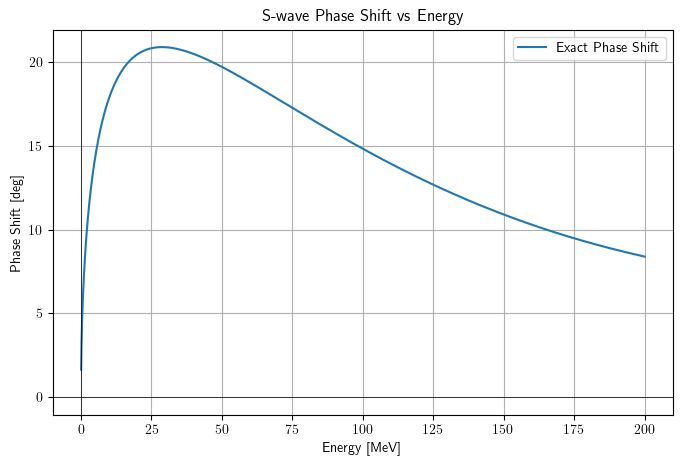

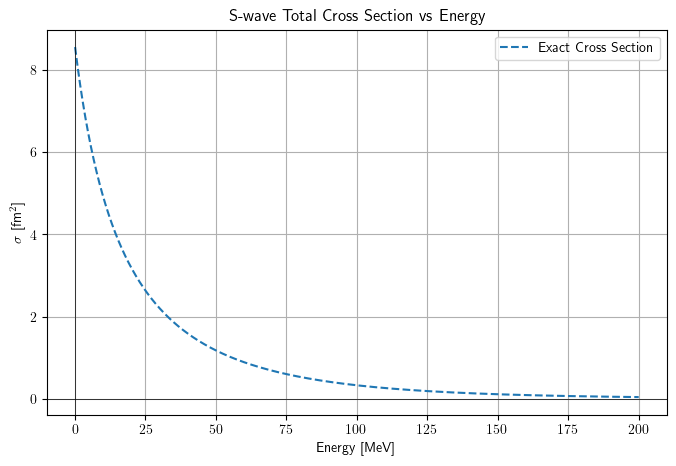

In [5]:
# Energy, exact phase shift, exact cross section
E            = []
delta0exact  = []
xsec0exact   = []
##########################################
# Energy incremental steps
dE=0.05   # MeV
##########################################
# Loop over the energies 
for i in range(1,4001):
     engy         = i*dE   
     k            = np.sqrt(mhbar*engy)          # fm^[-1]
     kprime       = np.sqrt(mhbar*(engy+vnot))   # fm^[-1]
#
     E.append(engy)                          # collecting the energies [0:200] MeV
#
     num = np.cos(k*xr)     *np.sin(kprime*xr)- np.cos(kprime*xr)*np.sin(k*xr)*kprime/k
     den = np.sin(kprime*xr)*np.sin(k*xr)     + np.cos(k*xr)*np.cos(kprime*xr)*kprime/k
#    
     delta0 = np.arctan2(num,den)
     delta0exact.append(delta0)             # analitical solution delta_0
#     
     xsec0=4.*pi*np.sin(delta0)**2/k**2     # analitical solution sigma_0
     xsec0exact.append(xsec0)

print(f"------------- S wave scattering -----------")
for i in [0,100-1, 1000-1, 2000-1, 3000-1]:
        print(f"-------------------------------------------")
        print(f"---- Energy [MeV] = {E[i]:.4f}")
        print(f"---- Phase Shift exact [deg] = {np.degrees(delta0exact[i]):.4f}")
        print(f"---- Cross Section exact [fm^2] = {xsec0exact[i]:.4f}")
print(f"-------------------------------------------")


# Plot phase shift
plt.figure(figsize=(8, 5))
plt.plot(E, np.degrees(delta0exact), label='Exact Phase Shift', linestyle='-')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.title('S-wave Phase Shift vs Energy')
plt.xlabel('Energy [MeV]')
plt.ylabel(r'Phase Shift [deg]')
plt.legend()
plt.grid(True)
plt.show()

# Plot cross sections
plt.figure(figsize=(8, 5))
plt.plot(E, xsec0exact, label='Exact Cross Section', linestyle='--')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.title('S-wave Total Cross Section vs Energy')
plt.xlabel('Energy [MeV]')
plt.ylabel(r'$\sigma$ [fm$^2$]')
plt.legend()
plt.grid(True)
plt.show()

### Numerical solutions for the S-wave
#### Validating the code

Let's go back to our original problem

\begin{eqnarray}
&& u^{\prime\prime}(r) + K(r) u(r)=0 \, ,
\end{eqnarray}
with 
\begin{equation}
 K(r)=\frac{2\,\mu}{\hbar^2}\left[E-V(r)\right] - \frac{\ell(\ell+1)}{r^2} = {k^\prime}^2- \frac{\ell(\ell+1)}{r^2}\, .
\end{equation}

To construct the solution of the equation above, we will use the Numerov algorithm
\begin{equation}
u_{i+1}\left(1+\frac{h^2}{12}K_{i+1} \right) -u_i\,\left(2-\frac{5\,h^2}{6}K_i\right)+
u_{i-1}\left(1+\frac{h^2}{12}K_{i-1} \right) +O(h^6)=0 \nonumber \, . 
\end{equation}

If the wave function $u$ is known in two points, say $r_{i-1}$ and $r_i$ with values $u_{i-1}=u(r_{i-1})$ and $u_{i}=u(r_{i})$, respectively, then we can construct the solution in  $r_{i+1}$ using:
\begin{equation}
u_{i+1}=\frac{u_i\,\left(2-\frac{5\,h^2}{6}K_i\right)-
u_{i-1}\left(1+\frac{h^2}{12}K_{i-1} \right)}{\left(1+\frac{h^2}{12}K_{i+1} \right)} \,.
\end{equation}
Note that the kernel $K(r)$ is known at each value of $E$ and $r$. 

![alt text](numerov.png "Title")

We only need to know the solution in two points. We know that as $r\rightarrow 0$, $u(r)\rightarrow r^{(\ell+1)}$. 

We use two grid points close to zero (for example, $r_1=h$ and $r_2=2\times h$, where $h$ is the 
step in $r$). The wave function in these two point then reads:
\begin{equation}
u_1=u(r_1)=h^{\ell+1} \, ,
\end{equation}
\begin{equation}
u_2=u(r_2)=(2\times h)^{\ell+1} \, .
\end{equation}
We will use these two starting points to build the solution outwards using the Numerov's method. 

### Exercise 4

Write a function that reads  in $r_{i-1}$, $r_{i}$, $u_{i-1}$, $u_{i}$, and the incremental step, and returns $u_{i+1}$.

In [6]:
# Numerov 
def numerov(xim, xi, uim, ui, elle, h, E):
         xip   =  xi + h
         kim   =  mhbar*( E - pot(xim, elle) )
         ki    =  mhbar*( E - pot(xi , elle) )
         kip   =  mhbar*( E - pot(xip, elle) )
         uip   = ( ui*(2. - 5.*h**2*ki/6.) - uim*(1. + h**2*kim/12.) )/( 1. + h**2*kip/12. )
         return uip

### Exercise 5

Use the Numerov's method to construct the wave function for each value of E, plot it as a function of x for E = 1, 25, 200 MeV. For comparison, plot also the free solution

\begin{equation}
u_{\rm free}=\sin{k\,r} \,. 
\end{equation}

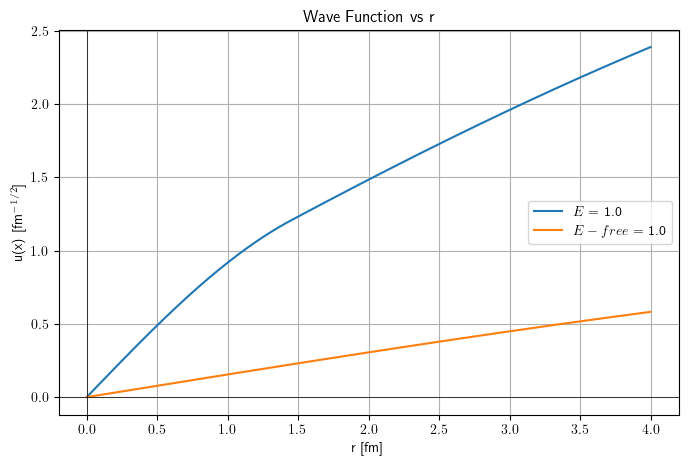

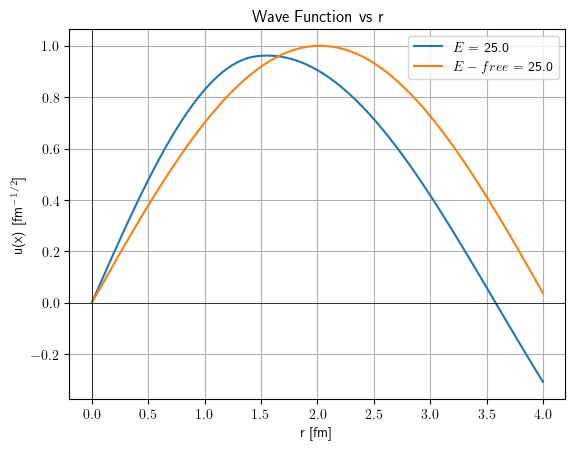

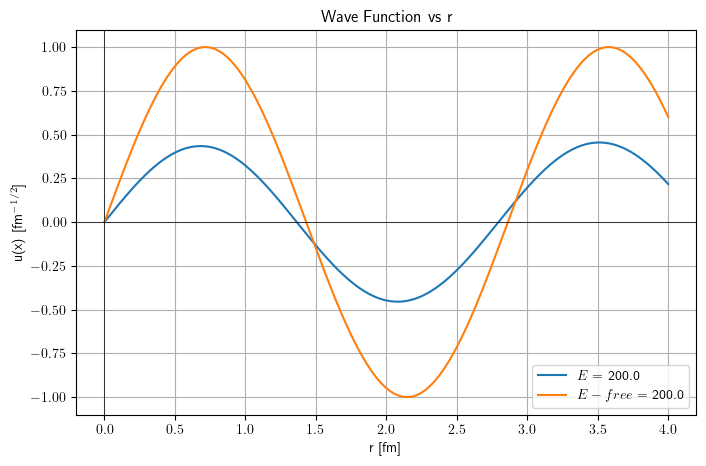

In [7]:
elle = 0

# grid in x, initialization of u
x     = np.linspace(0.001, 4.0, 2000)
u     = np.zeros_like(x)

# collect wave functions for each E
uatE      = np.zeros((len(E), len(u)))

# incremental step in x
h = x[1]-x[0]

# starting points
u[0] = x[0]**(elle+1)
u[1] = x[1]**(elle+1) 

# Loop in energy
for i in range(0,len(E)):
     xim  = x[0]   
     xi   = x[1]
     uim  = u[0]
     ui   = u[1]
     uatE[i,0]=u[0]
     uatE[i,1]=u[1]

##########################################
# Loop over the x's 
     for j in range(2,len(x)):
        u[j] = numerov(xim, xi, uim, ui, elle, h, E[i])
# Swapping starting points         
        xim  = x[j-1]   
        xi   = x[j]
        uim  = u[j-1]
        ui   = u[j] 
        uatE[i,j]=u[j]   # storing wave functions per each E

# Plot wave functions
plt.figure(figsize=(8, 5))
for i in [20-1]:
       k    = np.sqrt(mhbar*E[i]) 
       u_fig = uatE[i,:]
       plt.plot(x, u_fig,       label=f"$E$ = {E[i]:.1f}")
       plt.plot(x, np.sin(k*x), label=f"$E - free$ = {E[i]:.1f}")
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.title('Wave Function vs r')
plt.xlabel('r [fm]')
plt.ylabel('u(x) [fm$^{-1/2}$]')
plt.legend()
plt.grid(True)
plt.show()

for i in [500-1]:
       k    = np.sqrt(mhbar*E[i]) 
       u_fig = uatE[i,:]
       plt.plot(x, u_fig,       label=f"$E$ = {E[i]:.1f}")
       plt.plot(x, np.sin(k*x), label=f"$E - free$ = {E[i]:.1f}")
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.title('Wave Function vs r')
plt.xlabel('r [fm]')
plt.ylabel('u(x) [fm$^{-1/2}$]')
plt.legend()
plt.grid(True)
plt.show()

# Plot wave functions
plt.figure(figsize=(8, 5))
for i in [4000-1]:
       k    = np.sqrt(mhbar*E[i]) 
       u_fig = uatE[i,:]
       plt.plot(x, u_fig,       label=f"$E$ = {E[i]:.1f}")
       plt.plot(x, np.sin(k*x), label=f"$E - free$ = {E[i]:.1f}")
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.title('Wave Function vs r')
plt.xlabel('r [fm]')
plt.ylabel('u(x) [fm$^{-1/2}$]')
plt.legend()
plt.grid(True)
plt.show()

### Determining the phase shift in S-wave

From the knowledge of the behaviour of the wave function $u(r)$ for small values of $r$, we were able to construct the wave functions $u(r)$ for each energy $E$. 

To determine the phase shift as a function of the energy, we will exploit the behaviour of the wave in the outside region. In this region

\begin{equation}
u(r)  \rightarrow r \left[\cos{\delta_\ell}\,j_\ell(kr) - \sin{\delta_\ell}\,n_\ell(kr)\right] \, ,
\end{equation}

where $j_\ell(kr)$ and $n_\ell(kr)$ are the spherical Bessel functions. That means that, if we know the value of $u(r)$ in two points at sufficient large r, we can determine the phase shift. 

Let be $r_1$ and $r_2$ two points sufficiently far from the center of the interaction, then we have:

\begin{equation}
\frac{u(r_1)}{u(r_2)}=\frac{r_1 \left[\cos{\delta_\ell}\,j_\ell(kr_1) - \sin{\delta_\ell}\,n_\ell(kr_1)\right]}{r_2 \left[\cos{\delta_\ell}\,j_\ell(kr_2) - \sin{\delta_\ell}\,n_\ell(kr_2)\right]} \, .
\end{equation}

By inverting the equation above, one obtains:

\begin{equation}
\tan{\delta_\ell}=\frac{j_\ell(kr_1)-\alpha \, j_\ell(kr_2)}{n_\ell(kr_1) - \alpha \, n_\ell(kr_2)} \, ,
\end{equation}
where we defined 
\begin{equation}
\alpha=\frac{u(r_1)\,r_2}{u(r_2)\,r_1} \, .
\end{equation}

The determination of the phase shift then proceeds by numerically evaluating $\alpha$ and from it determining the phase shift for each vaule of the energy. 

### Exercise 6

Determine the phase shift in S-wave and compare it with the exact solution. 

In [8]:
# collect phase shift 
delta_l = np.zeros_like(E)

# Loop in energy
for i in range(0,len(E)):
      k = np.sqrt(mhbar*E[i])          # fm^[-1]
# two points far away from the interaction
      x1=x[-2]
      x2=x[-1]
      u1=uatE[i,-2]
      u2=uatE[i,-1]
#
      alpha = ## add
      jl1=special.spherical_jn(elle,k*x1)
      jl2=special.spherical_jn(elle,k*x2)
      yl1=special.spherical_yn(elle,k*x1)
      yl2=special.spherical_yn(elle,k*x2)
#      
      tgdelta = ## add
#
      delta   = np.arctan(tgdelta)
      if delta<0:
         delta = pi+delta   # little trick         
      delta_l[i] = delta 


print(f"------------- S wave scattering -----------")
for i in [0,100-1, 1000-1, 2000-1, 3000-1]:
        print(f"-------------------------------------------")
        print(f"---- Energy [MeV] = {E[i]:.4f}")
        print(f"---- Phase Shift exact [deg]     = {np.degrees(delta0exact[i]):.4f}")
        print(f"---- Phase Shift numerical [deg] = {np.degrees(delta_l[i]):.4f}")
print(f"-------------------------------------------")

# Plot phase shift
plt.figure(figsize=(8, 5))
plt.plot(E, np.degrees(delta0exact), label='Exact Phase Shift', linestyle='--')
plt.plot(E, np.degrees(delta_l), label='Numerical Phase Shift', linestyle='-')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.title('S-wave Phase Shift vs Energy')
plt.xlabel('Energy [MeV]')
plt.ylabel(r'Phase Shift [deg]')
plt.legend()
plt.grid(True)
plt.show()

SyntaxError: invalid syntax (217317210.py, line 13)

### Cross section 

Now that you have determined the phase shift you can calculate the cross section in S-wave.

### Exercise 7

Calculate the cross section in S-wave 
\begin{equation}
\sigma_\ell = \frac{4\, \pi}{k^2}\, (2\,\ell +1) \,\sin{\delta_\ell}^2 \, ,
\end{equation}
and plot it as a function of the energy.

Importantly, compare your result with the exact solution. 

In [ ]:
# collect cross section
xsec_0 = np.zeros_like(E)

# Loop in energy
for i in range(0,len(E)):
      k         = np.sqrt(mhbar*E[i])         
      xsec_0[i] = (2*elle+1)*4.*pi*np.sin(delta_l[i])**2/k**2


print(f"------------- S wave scattering -----------")
for i in [0,100-1, 1000-1, 2000-1, 3000-1]:
        print(f"-------------------------------------------")
        print(f"---- Energy [MeV] = {E[i]:.4f}")
        print(f"---- Cross Section exact [fm^2]     = {xsec0exact[i]:.4f}")
        print(f"---- Cross Section numerical [fm^2] = {xsec_0[i]:.4f}")    
print(f"-------------------------------------------")


# Plot cross sections
plt.figure(figsize=(8, 5))
plt.plot(E, xsec0exact, label='Exact Cross Section', linestyle='--')
plt.plot(E, xsec_0,     label='Numerical Cross Section', linestyle='-')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.title('S-wave Total Cross Section vs Energy')
plt.xlabel('Energy [MeV]')
plt.ylabel(r'$\sigma$ [fm$^2$]')
plt.legend()
plt.grid(True)
plt.show()

